In [1]:
import pandas as pd
from os.path import join as path_join
import joblib
import pickle

import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVR

import matplotlib as mpl
import matplotlib.pyplot as plt

## get data (mnist)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1)
# mnist.keys()

In [4]:
# X, y = mnist["data"], mnist["target"]

In [5]:
# folder_name = "/content/drive/My Drive/HandsonML/"
folder_name = ""

In [6]:
# with open(folder_name + 'mnist784.pickle', 'wb') as f:
#     pickle.dump((X,y), f)

In [7]:
with open(folder_name + 'mnist784.pickle', 'rb') as f:
    X,y = pickle.load(f)

In [8]:
X.shape, y.shape

((70000, 784), (70000,))

In [9]:
y[0]

np.uint8(5)

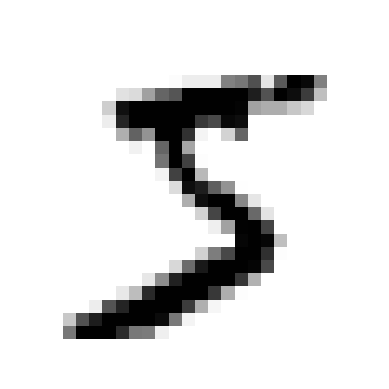

In [10]:
some_digit = X[0:1].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [11]:
y = y.astype(np.uint8)

In [12]:
# sets are already shuffled
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## basic and random evaluation

In [14]:
# from sklearn.base import clone
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import StratifiedKFold
# import numpy as np

# skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)

#     X_train_folds = X_train.iloc[train_index]
#     y_train_folds = y_train_5.iloc[train_index]
#     X_test_fold = X_train.iloc[test_index]
#     y_test_fold = y_train_5.iloc[test_index]

#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = np.sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))  # prints the accuracy for each fold


In [15]:
from sklearn.model_selection import cross_val_score

## performance measures

### confusion matrix

In [ ]:
# y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

### precision recall tradeoff

## Multiclass Classification

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict(some_digit)

c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [ ]:
with open('results/svm_clf.pickle', 'wb') as f:
    pickle.dump(svm_clf, f)

In [ ]:
with open('results/svm_clf.pickle', 'rb') as f:
    svm_clf = pickle.load(f)

In [ ]:
some_digit_scores = svm_clf.decision_function(some_digit)
some_digit_scores

c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [ ]:
np.argmax(some_digit_scores)

np.int64(5)

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
svm_clf.classes_[5]

np.uint8(5)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict(some_digit)

c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature nam

array([5], dtype=uint8)

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
# sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
# with open('results/sgd_clf.pickle', 'wb') as f:
#     pickle.dump(sgd_clf, f)

In [ ]:
with open('results/sgd_clf.pickle', 'rb') as f:
    sgd_clf = pickle.load(f)

In [ ]:
sgd_clf.predict(some_digit)

c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [ ]:
sgd_clf.decision_function(some_digit)

c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
# cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
np.array([0.87365, 0.85835, 0.8689 ])

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
np.array([0.8983, 0.891 , 0.9018])

array([0.8983, 0.891 , 0.9018])

## error analys

## augmentaton

In [ ]:
from scipy.ndimage import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

NameError: name 'plot_digit' is not defined

In [ ]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

KeyboardInterrupt: 

In [ ]:
ambiguous_digit = X_test[2589:2590]
knn_clf.predict_proba(ambiguous_digit)

c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

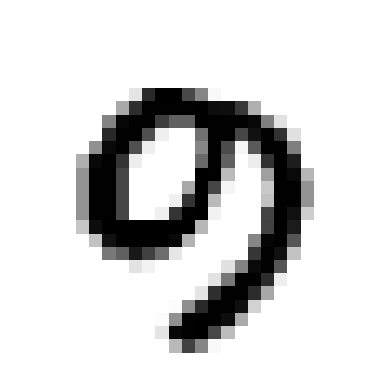

In [ ]:
plot_digit(ambiguous_digit.values)

## task1 logreg


In [16]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [17]:
# cross_val_score(logreg, X_train, y_train, cv=3, scoring="accuracy")
[0.91275, 0.91565, 0.9171 ]

[0.91275, 0.91565, 0.9171]

In [ ]:
# logreg = LogisticRegression(max_iter=1000)

# pipeline_for_scaler = Pipeline(steps=[
#     ('scaler', StandardScaler()),  # Use StandardScaler or MinMaxScaler
#     ('classifier', logreg)
# ])

# param_grid = {
#     'scaler': [StandardScaler(), MinMaxScaler()],
# }

In [ ]:
# grid_search = GridSearchCV(pipeline_for_scaler, param_grid, cv=3, scoring='accuracy')

# # Fit GridSearchCV or RandomizedSearchCV
# grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'scaler': [StandardScaler(), MinMaxScaler()]},
             scoring='accuracy')

In [18]:
# best_scaler = grid_search.best_estimator_.steps[0][1]
best_scaler = MinMaxScaler()

In [19]:
# # Feature engineering
# feature_engineering = Pipeline(steps=[
#     ('poly', PolynomialFeatures(degree=2, include_bias=False))
# ])

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Complete pipeline
pipeline = Pipeline(steps=[
    ('scaler', best_scaler),  # Use StandardScaler or MinMaxScaler
    # ('feature_engineering', feature_engineering),
    ('classifier', logreg)
])

# Define parameter grid for GridSearchCV or RandomizedSearchCV
param_grid = {
    'classifier__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'classifier__max_iter': [1000, 2000, 3000],
    # 'feature_engineering__poly__degree': [1, 2, 3]
}

time versus result:

gridsearch: dohuya

randomsearch 60 iter 280 min, 12 iter 180 min (same res),  

bayesian

halving grid search

halving random search


In [20]:
logreg.fit(X_train, y_train)

c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV or RandomizedSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best score (GridSearchCV):", grid_search.best_score_)

In [21]:

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=11, cv=3, scoring='accuracy')
random_search.fit(X_train, y_train)
print("Best parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best score (RandomizedSearchCV):", random_search.best_score_)

c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters (RandomizedSearchCV): {'classifier__solver': 'newton-cg', 'classifier__max_iter': 1000}
Best score (RandomizedSearchCV): 0.9176166666666666


In [ ]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=12, cv=3, scoring='accuracy')
random_search.fit(X_train, y_train)
print("Best parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best score (RandomizedSearchCV):", random_search.best_score_)

Best parameters (RandomizedSearchCV): {'classifier__solver': 'newton-cg', 'classifier__max_iter': 1000}
Best score (RandomizedSearchCV): 0.9176166666666666


In [ ]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=12, cv=3, scoring='accuracy')
random_search.fit(X_train, y_train)
print("Best parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best score (RandomizedSearchCV):", random_search.best_score_)

c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=60. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters (RandomizedSearchCV): {'classifier__solver': 'newton-cg', 'classifier__max_iter': 1000}
Best score (RandomizedSearchCV): 0.9176166666666666


In [22]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

# Halving Random Search
halving_random_search = HalvingRandomSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    factor=3,
    resource='n_samples',
    max_resources='auto',
    random_state=42,
    scoring='accuracy',
    cv=3
)

# Fit the model
halving_random_search.fit(X_train, y_train)

print("Best parameters (HalvingRandomSearchCV):", halving_random_search.best_params_)
print("Best score (HalvingRandomSearchCV):", halving_random_search.best_score_)


c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=1000. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters (HalvingRandomSearchCV): {'classifier__solver': 'saga', 'classifier__max_iter': 2000}
Best score (HalvingRandomSearchCV): 0.8166666666666668


In [23]:
from skopt import BayesSearchCV

# Define parameter grid for Bayesian optimization
param_grid_bayes = {
    'classifier__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'classifier__max_iter': [1000, 2000, 3000],
    # 'feature_engineering__poly__degree': [1, 2, 3]
}

# Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_grid_bayes,
    n_iter=50,
    cv=3,
    scoring='accuracy',
    random_state=42
)

# Fit the model
bayes_search.fit(X_train, y_train)

print("Best parameters (BayesSearchCV):", bayes_search.best_params_)
print("Best score (BayesSearchCV):", bayes_search.best_score_)


c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(1000), np.str_('newton-cg')] before, using random point [1000, 'lbfgs']
  warnings.warn(
c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\77019\Desktop\code\ml_handson\Handsome_ML\env_name\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objec

# one vs one

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
# Logistic Regression model with One-vs-One strategy
logreg = OneVsOneClassifier(LogisticRegression(max_iter=1000))

# Complete pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Use StandardScaler or MinMaxScaler
    ('classifier', logreg)
])

# Define parameter grid for GridSearchCV or RandomizedSearchCV
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__estimator__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'classifier__estimator__max_iter': [1000, 2000, 3000]
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

In [ ]:
# import seaborn as sns
# # Используем обычную линейную регрессию, минимизирующую сумму квадратов ошибки
# n_values = [n for n in range(1,31)]
# r2_scores = []
# mse_scores = []
# for n in n_values:
#   knn = KNeighborsRegressor(n_neighbors=n)
#   knn.fit(X_train, y_train)
#   record_metrics(knn.predict(X_test),y_test)

# print_metrics(knn.predict(X_test), y_test)

# sns.lineplot(x = n_values, y = r2_scores, marker = 'o')
# plt.xlabel("K Values")
# plt.ylabel("r2 Score")